In [1]:
# Utilities for EECS 442 Winter 2020 HW1
# Part of the code is based on the Dolly Zoom notebook created by David Fouhey
import imageio
import matplotlib.pyplot as plt
from itertools import product
import numpy as np


def generate_gif(R, file_name='cube.gif'):
    """
    Generate a gif of a rotating cube from a list of rotation matrices.

    Input:  R: A list of 3x3 rotation matrices.
            file_name: file_name to save files to.
    Output: None
    """
    with imageio.get_writer(file_name, mode='I') as writer:
        for rot in R:
            fig = renderCube(f=15, t=(0, 0, 3), R=rot)
            # Now we can save it to a numpy array.
            fig.canvas.draw()
            img = np.fromstring(fig.canvas.tostring_rgb(),
                                dtype=np.uint8,
                                sep='')
            img = img.reshape(fig.canvas.get_width_height()[::-1] + (3, ))
            writer.append_data(img)


def renderCube(f=15,
               scaleFToSize=None,
               t=np.array([0, 0, -3]),
               R=np.eye(3),
               file_name=None):
    """
    Renders a cube given camera instrinsics and extrinsics.

    Input:  f: focal length
            scaleFToSize: target size on the retrina (sqrt of area)
            t: camera translation (3x1 numpy array)
            R: camera rotation (3x3 numpy array)
            file_name: file path to save image (if provided)

    Output: Matplotlib figure handle
    """
    # Render the cube
    L = generateCube()
    t = np.array(t)
    pL = projectLines(f, R, t, L)

    if scaleFToSize is not None:
        # Then adjust f so that the image is the right size
        xRange, yRange = xyrange(pL)
        geoMean = (xRange * yRange)**0.5
        f = (f / geoMean) * scaleFToSize
        # re-render with the right focal length
        pL = projectLines(f, R, t, L)

    # Generate plot
    fig = plt.figure()
    plt.title("Cube @ [x=%.1f y=%.1f z=%.1f] f=%f" % (t[0], t[1], t[2], f))
    for i in range(pL.shape[0]):
        u1, v1, u2, v2 = pL[i, :]
        plt.plot((u1, u2), (v1, v2), lineWidth=2)

    # Format plot
    plt.axis('square')
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)

    # Save to file if filename is provided
    if file_name:
        plt.savefig(file_name)

    return fig


def generateCube():
    """
    Generates the lines for a unit cube.
    Output: np array of lines.
    """
    lines = []
    for x, y, z in product([0, 1], [0, 1], [0, 1]):
        # all corners, check changing all the dirensions
        # if in the cube, keep, but then center at 0
        for dx, dy, dz in [(1, 0, 0), (-1, 0, 0), (0, 1, 0), (0, -1, 0),
                           (0, 0, 1), (0, 0, -1)]:
            xp, yp, zp = x + dx, y + dy, z + dz
            if min([xp, yp, zp]) >= 0 and max([xp, yp, zp]) <= 1:
                lines.append(
                    (x - 0.5, y - 0.5, z - 0.5, xp - 0.5, yp - 0.5, zp - 0.5))
    return np.vstack(lines)


def xyrange(pL):
    # Returns the X and Y ranges for a line
    X, Y = np.vstack([pL[:, 0], pL[:, 2]]), np.vstack([pL[:, 1], pL[:, 3]])
    return np.max(X) - np.min(X), np.max(Y) - np.min(Y)


def projectOthographicLines(R, t, L):
    # TODO: Rewrite this function to project lines with an orthographic camera
    # You may refer to projectLines() for parameter types
    raise NotImplementedError


def projectLines(f, R, t, L):
    """
    Projects lines using the camera intrinsic and extrinsic parameters.
    Input:  f: focal length
            R: camera rotation (3x3 numpy array)
            t: camera translation (3x1 numpy array)
            L: Nx6 numpy array depicting N lines in 3D
    Output: 2D projection of lines (Nx4 numpy array)
    """
    if f == np.inf:
        return projectOthographicLines(R, t, L)
    pL = np.zeros((L.shape[0], 4))
    for i in range(L.shape[0]):
        # rotate and translate
        p = np.dot(R, L[i, :3]) + t
        pp = np.dot(R, L[i, 3:]) + t
        # apply projection u = x*f/z; v = y*f/z
        print("p: {}    pp: {}".format(p[2], pp[2]))
        pL[i, :2] = p[0] * f / p[2], p[1] * f / p[2]
        pL[i, 2:] = pp[0] * f / pp[2], pp[1] * f / pp[2]

    return np.vstack(pL)


<h1>Part 1

In [2]:
import math
def rotX(theta):
    # calculate values
    cos_value = math.cos(theta)
    sin_value = math.sin(theta)
    neg_sin_value = -1 * sin_value
    
    # initialize rotation matrix
    x_rot_matrix = np.eye(3)
    
    # set cosine values
    x_rot_matrix[1][1] = cos_value
    x_rot_matrix[2][2] = cos_value
    
    # set sin values
    x_rot_matrix[1][2] = neg_sin_value
    x_rot_matrix[2][1] = sin_value
    
    return x_rot_matrix
    

In [3]:
def rotY(theta):
    # calculate values
    cos_value = math.cos(theta)
    sin_value = math.sin(theta)
    neg_sin_value = -1 * sin_value
    
    # initialize rotation matrix
    y_rot_matrix = np.eye(3)
    
    # set cosine values
    y_rot_matrix[0][0] = cos_value
    y_rot_matrix[2][2] = cos_value
    
    # set sin values
    y_rot_matrix[2][0] = neg_sin_value
    y_rot_matrix[0][2] = sin_value
    
    return y_rot_matrix

In [4]:
rot = 0
R = []
while rot != math.pi * 2:
    rot += math.pi / 4
    R.append(rotY(rot))

In [5]:
take_1 = [rotX(math.pi/4), rotY(math.pi/4)]
take_2 = [rotY(math.pi/4), rotX(math.pi/4)]

In [6]:
# generate_gif(take_1, file_name='take_1.gif')

In [7]:
# renderCube(R=rotX(math.pi/6).dot(rotY(math.pi/4)), file_name='1c')

In [8]:
np.zeros((3, 4))

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [9]:
img = imageio.imread('prokudin-gorskii/00125v.jpg')

In [10]:
img.shape

(1024, 400)

<h2>Part 2

<h3>Combine

In [11]:
def split_triptych(trip):
    # TODO: Split a triptych into thirds and return three channels in numpy arrays
    img = imageio.imread('prokudin-gorskii/00125v.jpg')
    height = int(img.shape[0] / 3)
    width = img.shape[1]

    img_1 = img[0:height][0:width]
    img_2 = img[height: 2 * height][0:width]
    img_3 = img[2 * height: 3 * height][0:width]

    stacked_imgs = [img_3, img_2, img_1]
    stacked_img = np.dstack(stacked_imgs)

    imageio.imsave('combined.jpg', stacked_img)
    return stacked_img

In [12]:
height = int(img.shape[0] / 3)
width = img.shape[1]

img_1 = img[0:height][0:width]
img_2 = img[height: 2 * height][0:width]
img_3 = img[2 * height: 3 * height][0:width]

In [13]:
stacked_imgs = [img_3, img_2, img_1]

In [14]:
stacked_img = np.dstack(stacked_imgs)

In [15]:
imageio.imsave('combined.jpg', stacked_img)

In [16]:
type(stacked_img)

numpy.ndarray

<h3>Alignment

In [17]:
def align_and_combine(R, G, B, metric):
    # TODO: Use metric to align three channels and return the combined RGB image
    r = R
    g = G
    b = B

    b_r = best_offset(R, B, metric)
    g_r = best_offset(R, G, metric)

    print("b_r:", b_r)
    b = np.roll(b, b_r, axis=(0, 1))
    g = np.roll(g, g_r, axis=(0, 1))

    col = np.dstack([r, g, b])

    return col

In [18]:
def normalized_cross_correlation(p1, p2):
    product = np.mean((p1 - p1.mean()) * (p2 - p2.mean()))
    std = p1.std() * p2.std()
    if std != 0:
        res = product / std
        return res
    else:
        return 0

In [23]:
def best_offset(ch1, ch2, metric, Xrange=np.arange(-15, 16), Yrange=np.arange(-15, 16)):
    
    best_offset = -1
    out = []
    
    for x in Xrange:
        for y in Yrange:
            curr_offset = metric(ch1, np.roll(ch2, [x, y], axis=(0, 1)))
            if curr_offset > best_offset:
                best_offset = curr_offset
                out = [x, y]
            
    return out

In [24]:
data = {
    "prokudin-gorskii/00125v.jpg": {
        'y_start': 28,
        'y_offset': 330,
        'x_start': 28,
        'x_offset': 388
    },
    "prokudin-gorskii/00149v.jpg": {
        'y_start': 12,
        'y_offset': 330,
        'x_start': 28,
        'x_offset': 387
    },
    "prokudin-gorskii/00153v.jpg": {
        'y_start': 12,
        'y_offset': 334,
        'x_start': 26,
        'x_offset': 380
    },
    "prokudin-gorskii/00351v.jpg": {
        'y_start': 15,
        'y_offset': 334,
        'x_start': 25,
        'x_offset': 378,
    },
    "prokudin-gorskii/00398v.jpg": {
        'y_start': 26,
        'y_offset': 332,
        'x_start': 15,
        'x_offset': 378,
    },
    "prokudin-gorskii/01112v.jpg": {
        'y_start': 15,
        'y_offset': 332,
        'x_start': 14,
        'x_offset': 378,
    },
    "tableau/efros_tableau.jpg": {
        'y_start': 0,
        'y_offset': 418,
        'x_start': 0,
        'x_offset': 505,
    }
}

In [25]:
def split_triptych_augmented(trip, img_data):
    
    y_start = img_data['y_start']
    y_offset = img_data['y_offset']
    x_start = img_data['x_start']
    x_offset = img_data['x_offset']
    
    stacks = []
    
    for i in range(0, 3):
        img_slice = trip[y_start: y_start + y_offset, x_start: x_start + x_offset]
        stacks.insert(0, img_slice)
        y_start += y_offset
        
    colored = np.dstack(stacks)
    return colored

In [26]:
i = 0
for file in data:
    img = imageio.imread(file)
    img_data = data[file]
    split_img = split_triptych_augmented(img, img_data)
    print(file)
    
    r = split_img[:, :, 0]
    g = split_img[:, :, 1]
    b = split_img[:, :, 2]

    col_align_img = align_and_combine(r, g, b, normalized_cross_correlation)
    new_file_name = "colored_" + str(i) + ".png"
    imageio.imsave(new_file_name, col_align_img)
    
    i += 1

prokudin-gorskii/00125v.jpg
b_r: [12, 1]
prokudin-gorskii/00149v.jpg
b_r: [13, 0]
prokudin-gorskii/00153v.jpg
b_r: [0, -3]
prokudin-gorskii/00351v.jpg
b_r: [1, 0]
prokudin-gorskii/00398v.jpg
b_r: [6, 1]
prokudin-gorskii/01112v.jpg
b_r: [13, -1]
tableau/efros_tableau.jpg
b_r: [6, 5]


<h3>Offsets

In [44]:
from skimage.transform import rescale, resize, downscale_local_mean
import matplotlib.pyplot as plt

test_file = 'prokudin-gorskii/00125v.jpg'
image = imageio.imread(test_file)
split_img = split_triptych_augmented(img, img_data)
    
r = split_img[:, :, 0]
g = split_img[:, :, 1]
b = split_img[:, :, 2]

print(r.shape)
print(g.shape)
print(b.shape)

dum = r[:, 44:-43]
dum.shape

(418, 505)
(418, 505)
(418, 505)


(418, 418)

<h1> Part 3

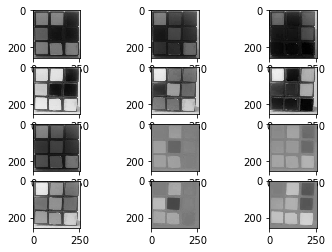

In [45]:
_, ax = plt.subplots(4, 3)

ax[0][0].imshow(inside_pic[:,:, 0], cmap="gray", vmin=0, vmax=255)
ax[0][1].imshow(inside_pic[:,:, 1], cmap="gray", vmin=0, vmax=255)
ax[0][2].imshow(inside_pic[:,:, 2], cmap="gray", vmin=0, vmax=255)

ax[1][0].imshow(outside_pic[:,:, 0], cmap="gray", vmin=0, vmax=255)
ax[1][1].imshow(outside_pic[:,:, 1], cmap="gray", vmin=0, vmax=255)
ax[1][2].imshow(outside_pic[:,:, 2], cmap="gray", vmin=0, vmax=255)

new_inside_pic = rgb2lab(inside_pic[:,:, :3])
new_outside_pic = rgb2lab(outside_pic[:,:, :3])

ax[2][0].imshow(new_inside_pic[:,:, 0], cmap="gray", vmin=0, vmax=100)
ax[2][1].imshow(new_inside_pic[:,:, 1], cmap="gray", vmin=-128, vmax=127)
ax[2][2].imshow(new_inside_pic[:,:, 2], cmap="gray", vmin=-128, vmax=127)

ax[3][0].imshow(new_outside_pic[:,:, 0], cmap="gray", vmin=0, vmax=100)
ax[3][1].imshow(new_outside_pic[:,:, 1], cmap="gray", vmin=-128, vmax=127)
ax[3][2].imshow(new_outside_pic[:,:, 2], cmap="gray", vmin=-128, vmax=127)

plt.show()

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


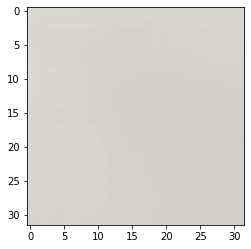

In [59]:
img1 = imageio.imread('im1.jpg')
img2 = imageio.imread('im2.jpg')

x = resize(img1, (256, 256))
plt.imshow(x[128:160, 128:160])

y = resize(img2, (256, 256))
plt.imshow(y[128:160, 128:160])

new_img1 = x[128:160, 128:160]
new_img2 = y[128:160, 128:160]

imageio.imsave('im1_final.jpg', x)
imageio.imsave('im2_final.jpg', y)

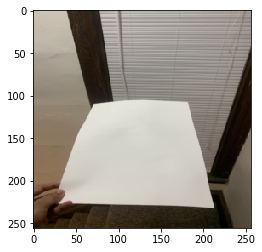

In [55]:
img2 = imageio.imread('im2.jpg')

y = resize(img2, (256, 256))
plt.imshow(y)

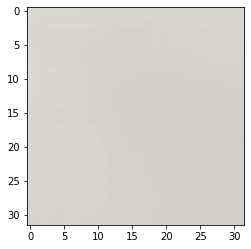

In [56]:
plt.imshow(y[128:160, 128:160])